## Final Project Submission - Notebook 1

Please fill out:
* Student name: Aaron Lee
* Student pace: self paced
* Scheduled project review date/time: 7/22/2020, 9:00AM CT
* Instructor name: Jeff Herman
* Blog post URL: https://medium.com/me/stats/post/62425ac4eafa

## Questions for This Project
* What factors most affect the home value?
* When should you sell your home?
* What location factors most affect the value of a home?
* What can you do to maximize profits when you sell a home?

# Exploratory Data Analysis and Preprocessing


## Import Data

We will start by importing the King County data and do some exploratory data analysis.
  

In [28]:
# Import libraries used in this project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')


import folium
import folium.plugins
import branca
import branca.colormap as cm
from shapely.geometry import Polygon, Point, MultiPolygon, shape, GeometryCollection

import json
import pickle


import datetime

%matplotlib inline


## First look at data set
### Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed *
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

#### * View description was incorrect.  I found the actual info on the King County assessor website


#### More about grade and condition  (King County website: https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r)

**Building Grade**
Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

* 1-3 Falls short of minimum building standards. Normally cabin or inferior structure.
* 4 Generally older, low quality construction. Does not meet code.
* 5 Low construction costs and workmanship. Small, simple design.
* 6 Lowest grade currently meeting building code. Low quality materials and simple designs.
* 7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.
* 8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.
* 9 Better architectural design with extra interior and exterior design and quality.
* 10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.
* 11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.
* 12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.
* 13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

**Building Condition**    	
Relative to age and grade. Coded 1-5.
* 1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.
* 2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.
* 3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.
* 4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.
* 5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.

**View**
Rating from 0 to 4 on how good the view from the home is.

In [29]:
# Import data set from provided csv
kc = pd.read_csv('kc_house_data.csv')
# kc.info()  # mix of floats and ints except for date and sqft_basement
kc.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Look at the distributions of our variables

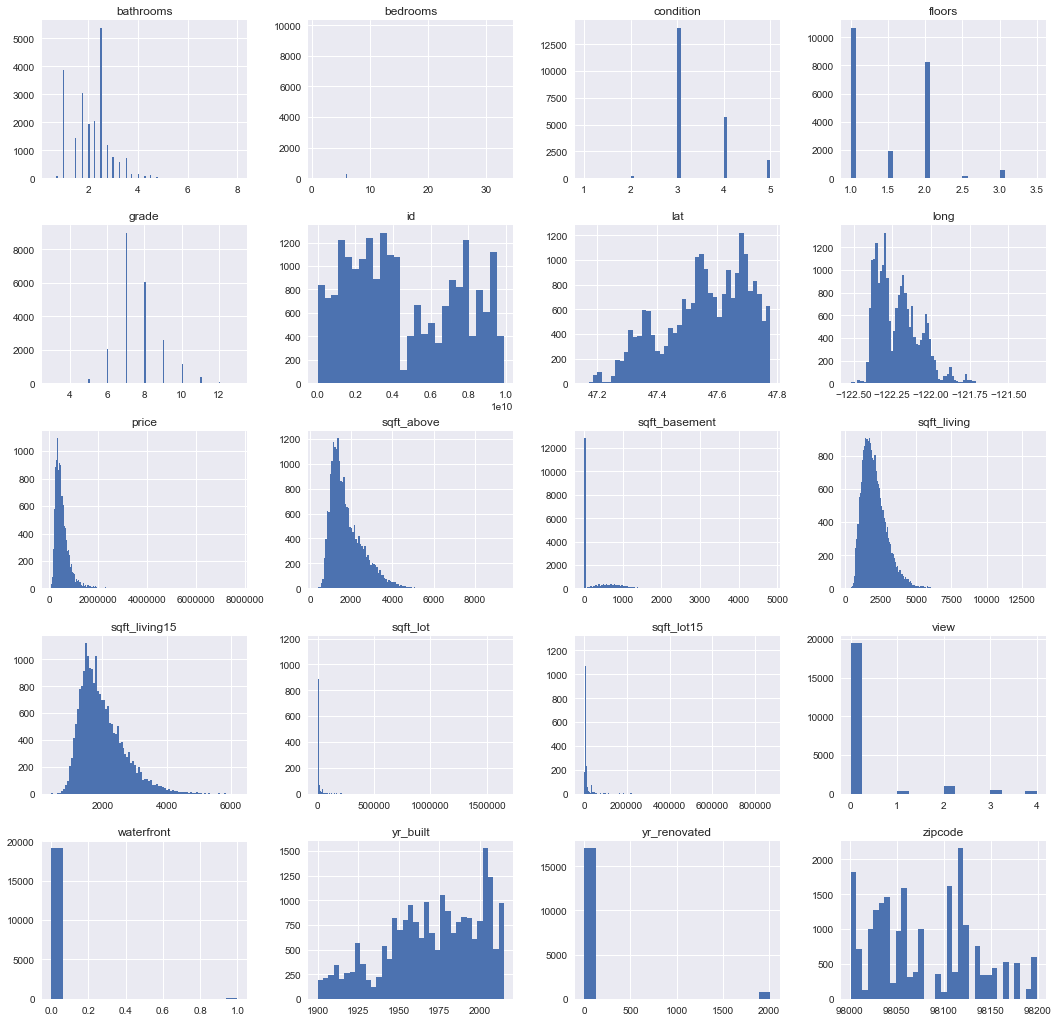

In [30]:
# Before plotting, let's take care of the basement_sqft which is currently a string object
kc.sqft_basement = pd.to_numeric(kc.sqft_basement, errors='coerce')

# Make a histogram of each variable to get an idea of the shapes
plots = kc.hist(figsize=(18,18), bins='auto')  # saved it to suppress the extra output

#### Categorical data   
Very few waterfront properties in general.
Very few homes have any renovations.
Some zipcodes are massively underrepresented.  May cause trouble if we use it as a categorical.
Very few homes have rated views, but more have views than waterfront.  Might be good surrogate.

#### Continuous data
Sqft have an normal shape with a heavy right skew.  Can probably be fixed with a log graph.
sqft_lot (both) have long right tail
Looks like there are a lot of zero values for sqft_basement (no basement). May make it a categorical has_basement.


## Scatter Matrix of Numerical Data

As a preliminary attempt to identify relationships between continuous data, we will make a scatter matrix.


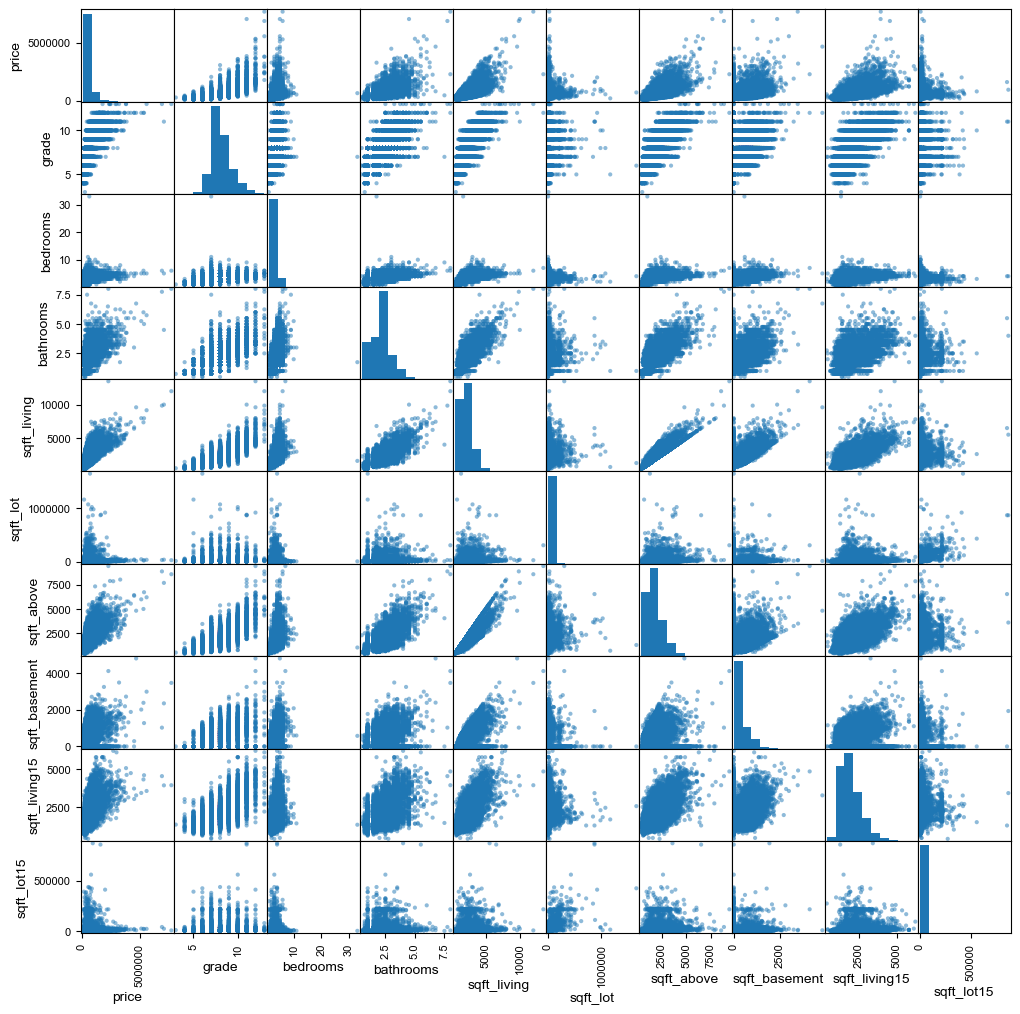

In [4]:
# identify all of the continous data columns from our set.
plt.style.use('default')

all_continuous = ['price', 'grade', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15']

kc_all_continuous = kc.loc[:, all_continuous]
pd.plotting.scatter_matrix(kc_all_continuous, figsize=[12, 12]);

plt.style.use('seaborn')


#### Scatter matrix results
We see an obvious relationship between all of the sqft categories as expected.  A large home is likely to be on a large lot with a large basement etc.  This might not hold true for dense urban and more sparse rural areas.

At first glance, price seems to be most strongly related to sqft_living.  Bedrooms, bathrooms, and grade also appear correlated.

## Preprocess Data

### Address NaN values and placeholders
We will look for NaN values and anomolies as well as filter out any unwanted data.

In [31]:
# Look for missing data and anomolies.
kc.isna().sum()  


id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

We see three columns with NaN values
'waterfront' has 2376 NaN.  That is nearly 10% of the data.  We will not remove it, but assume no entry means 0 (not waterfront)

yr_renovated 
- has 3842 NaN.  I will interpret this as no renovation done to this house.
- also has a year of zero for all but 4586 houses which we also interpret as no renovation.
- could make a categorical was_renovated to track whether it has been renovated.

view
- has 63 NaN values
- will make any NaN view equal to zero. Most views are zero.

### Process duplicates and anomolies

In [6]:
# First, lets see if we have any duplicates
kc.loc[~kc.index.duplicated(keep='first')].count()
# no duplicates found.  That's good


# Waterfront has some NaN values.  Likely data entry left blank for non waterfront properties.
kc.waterfront.unique()  # contains NaNs


# replace NaN values
values = {'waterfront': 0, 'yr_renovated': 0, 'view': 0}
kc = kc.fillna(value=values)


# Let's get rid of the zero's and assume there was no renovation done.
# We will make yr_renovated equal to the build year since new construction is a 'renovation'.
#kc.loc[kc['yr_renovated'] == 0] = kc.loc[kc['yr_renovated'] <= 1900]['yr_built']
kc['yr_renovated'] = np.where(kc['yr_renovated'] == 0, kc['yr_built'], kc['yr_renovated'])


# change the date to datetime object so I can extract month and year and order them
kc['date'] = pd.to_datetime(kc['date'])
kc['month'] = kc['date'].apply(lambda x: int(x.month))

# add a column which is just a binary has_basement
# 21 homes have ? for basement 
kc['has_basement'] = kc['sqft_basement'].apply(lambda x: 1 if str(x) == "?" else float(x)) > 0



def make_point(longlat):
    '''
    Returns a shapely Point object from a latlong location.
            Parameters:
                    latlong (list): iterable of len 2 [lat, long]
            Returns:
                    shapely Point object
    '''
    # note that the point requires (long, lat) or (x, y) format
    return Point(longlat[0], longlat[1])


# add shapely points to my data
# create a combined longlat column
kc['longlat'] = list(zip(kc.long, kc.lat))
    
    
# use my new make_point function to create a column of Point objects for plotting
kc['points'] = kc['longlat'].apply(make_point)
kc.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,has_basement,longlat,points
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1955.0,98178,47.5112,-122.257,1340,5650,10,False,"(-122.257, 47.5112)",POINT (-122.257 47.5112)
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1991.0,98125,47.7210,-122.319,1690,7639,12,True,"(-122.319, 47.721000000000004)",POINT (-122.319 47.721)
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933.0,98028,47.7379,-122.233,2720,8062,2,False,"(-122.23299999999999, 47.7379)",POINT (-122.233 47.7379)
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965.0,98136,47.5208,-122.393,1360,5000,12,True,"(-122.39299999999999, 47.5208)",POINT (-122.393 47.5208)
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987.0,98074,47.6168,-122.045,1800,7503,2,False,"(-122.045, 47.6168)",POINT (-122.045 47.6168)


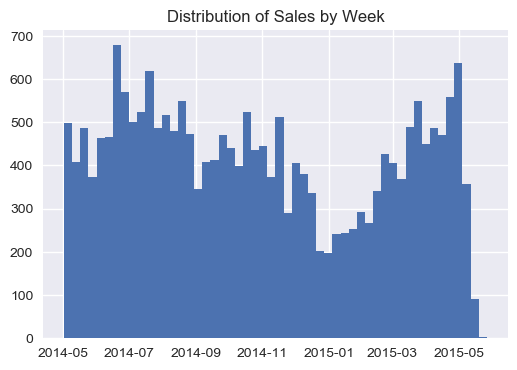

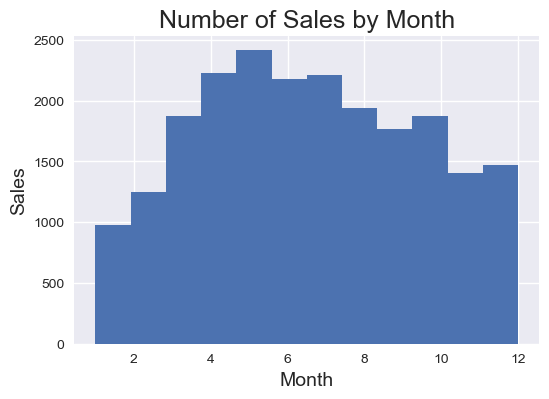

Text(0.5, 1.0, 'Mean sales price by Month')

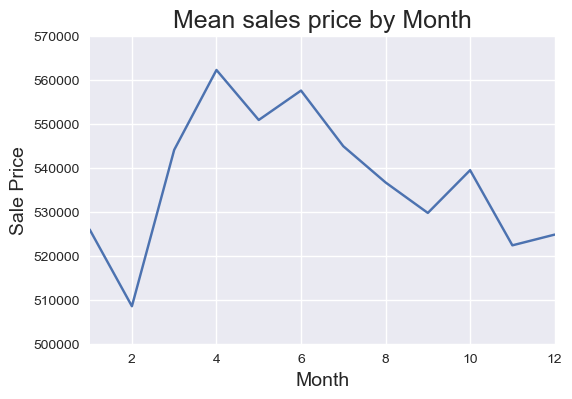

In [7]:
# Since I now have dates, I will look at sales by date to see if it could potentially be a factor  



#. Each bin represents a week.  There is a definite sales period in spring/summer and low points in winter months.
kc['date'].hist(bins=52, figsize=[6, 4])
plt.title('Distribution of Sales by Week')
plt.show()

# Also want to look at it by month
kc['month'].hist(bins=12, figsize=[6, 4])
plt.title('Distribution of Sales by Month')
plt.ylabel('Sales', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.title("Number of Sales by Month", fontsize=18)

plt.show()


# Look at the effect of time of year on saleprice as well
plt.figure(figsize=(6, 4))
kc.groupby(['month'])['price'].mean().plot()
plt.ylabel('Sale Price', fontsize=14)
plt.xlabel('Month', fontsize=14)

plt.ylim([500000, 570000])
plt.title("Mean sales price by Month", fontsize=18)


There is a clear relationship between sales, prices, and the sale date.  I will recommend that you sell during March/April and be flexible on buying dates.

## Location, location, location.

After some research, it looks like the old adage "location, location, location" seems to have some merit.
Homes near city centers, shopping, water, recreation, and good school districts have higher value.

I am interested in location data, and was given long/lat on my homes in this dataset.
The following will be some investigating in that regard.

One of our questions asks what location factors affect sales price.  This might take some additional work with long/lat for homes.

## Add school district data to my set

I will add school district data to my project.  King County has 20 school districts.
I included the geojson shape files from the King County GIS website and will extract the district info using
lat/long information.

I will use this data in lieu of zipcodes which showed that some zips lacked data.  Also takes us from 70+ zip codes to just 20 school districts which would be more suitable for categorical.

In [32]:
import folium  
import json

# might not need all of these
from shapely.geometry import Polygon, Point, MultiPolygon, shape, GeometryCollection


def which_district(point, polygon_list, district_names):
    '''
    Returns the name from district_names list if point is in polygon from polygon_list
            
            Parameters:
                    point (Point object): Shapely Point
                    polygon_list (list): Shapely Shape objects (MultiPolygon)
                    district_names (list): list of school district names taken from geo_data

            Returns:
                    binary_sum (str): Binary string of the sum of a and b
    '''
    count = 0
    name = 'None'
    for i in range(len(polygon_list)):
        if polygon_list[i].contains(point):
            name = district_names[i]
            count += 1
    if count == 1: return name
    else: print("District ID failure at", point)




kc_schools = kc.copy()

# load GeoJSON file containing sectors
my_shapefile = "geojson_files/districts.geojson"  # geojson shape file for district boundaries

with open(my_shapefile, 'r') as f:
    school_geo_data = json.load(f)


# make a list of the names of the school districts to apply later
dist_names = [x["properties"]["NAME"] for x in school_geo_data['features']]  # It worked!

# NOTE: buffer(0) is a trick for fixing scenarios where polygons have overlapping coordinates 
# We go through every item in the geojson features, and create mappable polygons from it
polygons = GeometryCollection([shape(feature["geometry"]).buffer(0) for feature in school_geo_data['features']])
polygons[0]

# create a combined longlat column
kc_schools['longlat'] = list(zip(kc_schools.long, kc_schools.lat))

# use my new make_point function to create a column of Point objects for plotting
kc_schools['points'] = kc_schools['longlat'].apply(make_point)
kc_schools
 
# There is likely a fix, but it only costs 60 lines for now, so will save that for later if I have time.
kc_schools.dropna(inplace=True)


        
kc_schools['school_district'] = kc_schools['points'].apply(which_district, args=(polygons, dist_names,))

    
# # get the mean value across all districts
district_data = kc_schools.groupby('school_district').aggregate(np.mean)
district_data['price'] = district_data['price'].round(-3) // 1000
district_data.reset_index(inplace = True)
district_data[['school_district', 'price']]

District ID failure at POINT (-122.076 47.5784)
District ID failure at POINT (-122.204 47.5716)
District ID failure at POINT (-122.083 47.5968)
District ID failure at POINT (-122.216 47.6967)
District ID failure at POINT (-122.324 47.3573)
District ID failure at POINT (-122.465 47.3979)
District ID failure at POINT (-122.11 47.5943)


,school_district,price
0,Auburn,289.0
1,Bellevue,935.0
2,Enumclaw,321.0
3,Federal Way,287.0
4,Fife,299.0
5,Highline,323.0
6,Issaquah,684.0
7,Kent,319.0
8,Lake Washington,670.0
9,Mercer Island,1178.0


The districts for each home are now added and stored in district_data shown above.  

School district categoricals seem to be an excellent indicator of home price.  Mercer Island and Bellevue have a noticeable discrepency.

## School District score
While school district is obviously meaningful, there are 20 districts.  
A few of the districts are barely represented and it might cause problems with regression.
I intend to change the district name to a district score.
niche.com has scores from A+ to F on school districts.

https://www.niche.com/k12/search/best-school-districts/c/king-county-wa/

Our data goes from C+ to A+.  We will give C+ a 0 and A+ a 6.  Each grade level will be increased by 1 to make it ordinal.


In [9]:
# assign a value to school district.
# I am using data from niche.com which assigns a letter grade.  I will order them manually
dist_names

dist_scores = [ ['Seattle', 4],
                ['Federal Way', 0],  
                ['Enumclaw', 1],
                ['Mercer Island', 6],
                ['Highline', 0],
                ['Vashon Island', 4],
                ['Renton', 1],
                ['Skykomish', 1],
                ['Bellevue', 6],
                ['Tukwila', 1],
                ['Riverview', 3],
                ['Auburn', 2],
                ['Tahoma', 5],
                ['Snoqualmie Valley', 3],
                ['Issaquah', 6],
                ['Shoreline', 5],
                ['Lake Washington', 6],
                ['Kent', 2],
                ['Northshore', 5],
                ['Fife', 2],
                ]

def get_score(dist, dist_scores):
    # give a district name (dist) and a list of dist_scores, and return the score (1 to 6)
    for name, score in dist_scores:
        if dist == name:
            return score
    else:
        print("Failed", dist)

kc_schools['school_score'] = kc_schools['school_district'].apply(get_score, args=[dist_scores])
kc_schools.head()  # WORKS!!

Failed None
Failed None
Failed None
Failed None
Failed None
Failed None
Failed None
Failed None
Failed None
Failed None


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,month,has_basement,longlat,points,school_district,school_score
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,47.5112,-122.257,1340,5650,10,False,"(-122.257, 47.5112)",POINT (-122.257 47.5112),Seattle,4.0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,47.7210,-122.319,1690,7639,12,True,"(-122.319, 47.721000000000004)",POINT (-122.319 47.721),Seattle,4.0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,47.7379,-122.233,2720,8062,2,False,"(-122.23299999999999, 47.7379)",POINT (-122.233 47.7379),Northshore,5.0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,47.5208,-122.393,1360,5000,12,True,"(-122.39299999999999, 47.5208)",POINT (-122.393 47.5208),Seattle,4.0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,47.6168,-122.045,1800,7503,2,False,"(-122.045, 47.6168)",POINT (-122.045 47.6168),Lake Washington,6.0


## Add Distance to Waterfront

Another location based property I am interested in including is the distance from a home to the waterfront.

While there are only 141 waterfront properties, you can see that they all sit on the lakes and islands which are very desirable locations.

I want to add a column which calculates the linear distance to the nearest waterfront positive property.




In [10]:
kc_water = kc_schools.copy()

def find_closest_water(point, df):
    # return the minimum distance from a waterfront property in miles
    all_locs = df['points']
    closest = all_locs.apply(point.distance).min()
    miles = closest * 68.94  # convert degrees to miles
    miles += 0.1 # keeps us from getting zeros in my data (prevents divide by zero later)
    return miles

waterfront_properties = kc_water[kc_water['waterfront'] == True]
kc_water.waterfront.sum()


test_point = kc_water['points'][10]
find_closest_water(test_point, waterfront_properties)


kc_water['nearest_water'] = kc_water['points'].apply(find_closest_water, args=(waterfront_properties,))
kc_water['nearest_water'].describe()

count    21143.000000
mean         4.450427
std          4.665554
min          0.100000
25%          1.588210
50%          2.921702
75%          5.011550
max         52.353748
Name: nearest_water, dtype: float64

## Distance to Downtown
Another location based property which seems significant is the distance from downtown Seattle.
I chose Pikes Place Market as the city center and calculated the linear distance from there.

In [11]:
kc_downtown = kc_water.copy()

def find_downtown(point, pikes_place):
    # returns distance to Pikes Place Market center in miles
    dist = point.distance(pikes_place)
    miles = dist * 68.94 
    return miles


pikes_place = Point([-122.338560, 47.611572])

kc_downtown['downtown_dist'] = kc_downtown['points'].apply(find_downtown, args=[pikes_place])
kc_downtown['downtown_dist'].describe()

count    21143.000000
mean        14.076360
std          8.572113
min          1.143239
25%          6.583398
50%         12.664544
75%         20.050303
max         70.909833
Name: downtown_dist, dtype: float64

## Show a Folium map of prices by zipcode

Since zipcode is included in the dataset, I wanted to look at how price is releated to zipcode.

I made a map using choropleth class from folium. 

 https://www.kingcounty.gov/services/gis.aspx contains many shapefiles and geojson datafiles.
 We extract the geometry data and polygons to plot shapes to the map (in this case zipcodes).
 

In [12]:
import folium

#from IPython.display import display


shape = "geojson_files/Zipcodes_for_King_County_and_Surrounding_Area__Shorelines____zipcode_shore_area.geojson"
with open(shape, 'r') as f:
    geo_data = json.load(f)

#print(geo_data['features'])
geo_data['features'][0].keys()
    
# Set zipcode type to string (folium)  
# HAD TO LOOK THIS ONE UP
kc_zip = kc.copy()


def map_by_zipcode(zipcode_data, col):
    """
    Generates a folium map of King County with selected feature mean
        :param zipcode_data: zipcode dataset
        :param feature: feature to display
        :return: m (Folium Map object)
    """

    centerlat = (zipcode_data['lat'].max() + zipcode_data['lat'].min()) / 2
    centerlong = (zipcode_data['long'].max() + zipcode_data['long'].min()) / 2
    
    # Initialize Folium Map with Seattle latitude and longitude
    m = folium.Map(location=[centerlat, centerlong], 
                   zoom_start=10,
                   control_scale=False,
                   tiles='Stamen Toner')
    

    # Create choropleth map  
    folium.Choropleth(
        geo_data=geo_data,
        name='choropleth',
        data=zipcode_data,
        columns=['zipcode', col],
        key_on='feature.properties.ZIPCODE',
        fill_color='Spectral',
        fill_opacity=0.6,
        nan_fill_opacity=0,
        line_opacity=1,
        legend_name= (col + ' mean').upper()
    ).add_to(m)
    
    #folium.LayerControl().add_to(m)

    return m



kc_zip['zipcode'] = kc_zip['zipcode'].astype('str')

# get the mean value across all zipcodes
zipcode_data = kc_zip.groupby('zipcode').aggregate(np.mean)
zipcode_data.reset_index(inplace = True)


feature = 'price'  # Change this to investigate other relationships
m = map_by_zipcode(zipcode_data, feature)
m.save('folium_maps/price_zipcode.html')

## Colormap of prices by location

I am looking to visualize the sale price by location on a map to maybe spot some groupings or trends.

At first, I tried to make a simple heatmap, but it was not weighted in a meaningful way.
I instead made a colormap using the branca library (Folium)

Each home sale is assigned a gradient color at their lat/long location.

Due to jupyter notebook limitations, the map is saved to an html file.

In [33]:

import folium
import pandas as pd
import folium.plugins

import branca
import branca.colormap as cm


def get_center_latlong(df):
    # get the center of my map for plotting
    centerlat = (df['lat'].max() + df['lat'].min()) / 2
    centerlong = (df['long'].max() + df['long'].min()) / 2
    return centerlat, centerlong


def make_colormap(df, column, vmin, vmax, colors=['green', 'yellow', 'red'], radius=0):
    '''
     Create an html colormap of home prices and save it as column + '_colormap.html'

            Parameters:
                    df (DataFrame): dataframe of housing data with lat long
                    column (str): column name for hue attribute
                    vmin (int): lowest value on scale
                    vmx (int): highest value on scale
                    colors (list): mapped colors low to high, default to ['green', 'yellow', 'red']
                    radius (int): size of circle on colormap. default to 10

            Returns:
                    None
    '''
    centerlat, centerlong = get_center_latlong(df)

    colormap = cm.LinearColormap(colors=colors,vmin=vmin,vmax=vmax)

    m = folium.Map(location=[centerlat, centerlong], zoom_start=10, tiles='Stamen Toner',
    )


    # go through each home in set, make circle, and add to map.
    for i in range(len(df)):
        bed_bath = 'Bed/Bath: {} / {}'.format(df.iloc[i]['bedrooms'], df.iloc[i]['bathrooms'])
        sqft = 'Sqft: {}'.format(df.iloc[i]['sqft_living'])
        popup = '<h5>{}</br>{}</h5>'.format(bed_bath, sqft)
        #iframe = '<iframe></iframe>'
        folium.Circle(
            location=[df.iloc[i]['lat'], df.iloc[i]['long']],
            radius=radius,
            fill=True,
            color=colormap(df.iloc[i][column]),
            fill_opacity=0.2
        ).add_child(folium.Popup(popup, max_width=400)).add_to(m)

    m.add_child(colormap)

    # Save map 
    # I found a problem with plotting too much data (over 2000 pts) to jupyter notebook
    m.save('folium_maps/' + column + '_colormap.html')
    

In [34]:
# make a colormap of price
make_colormap(kc, 'price', 120000, 2000000, radius=3)


In [35]:
# make a colormap of views
make_colormap(kc[kc['view'] > 0], 'view', 1, 4, colors=['blue', 'purple', 'pink'], radius=50)


In [16]:
# make a colormap of views
make_colormap(kc_downtown, 'downtown_dist', 0, 30, radius=3)


In [17]:
# make a colormap of views
make_colormap(kc_downtown, 'nearest_water', 0, 5, radius=3, colors=['blue', 'purple', 'pink'])

## Map of Mean Price by School District
Now that we have school districts, we will try to visualize it in folium.
We will make a choropleth map to visualize relative housing prices by school district. Similar to zipcode plot.

In [18]:
# Visualize the school data
# THis one runs fast as only plotting 20 shapes and hue

def get_center_latlong(df):
    # get the center of my map for plotting
    centerlat = (df['lat'].max() + df['lat'].min()) / 2
    centerlong = (df['long'].max() + df['long'].min()) / 2
    return centerlat, centerlong


def map_by_schooldist(data, col):
    """
    Returns a Foliium map of King County with selectd feature mean

            Parameters:
                    data (DataFrame): data with lat, long,latlong, col
                    col (str): selected/feature column (e.g. 'price')

            Returns:
                    Point object

    """
    centerlat, centerlong = get_center_latlong(data)
    
    
    # Initialize Folium Map with Seattle latitude and longitude
    m = folium.Map(location=[centerlat, centerlong], 
                   zoom_start=10,
                   control_scale=False)
                   #tiles='Stamen Toner')
    

    # Create choropleth map  
    folium.Choropleth(
        geo_data=school_geo_data,
        name='choropleth',
        data=data,
        columns=['school_district', col],
        key_on='feature.properties.NAME',
        fill_color='Spectral',
        fill_opacity=0.8,
        nan_fill_opacity=0,
        line_opacity=1,
        legend_name='mean ' + col + " x $1000"
    ).add_to(m)
    
    folium.LayerControl().add_to(m)

    return m


# Clean up from the district stuff
kc_schools.dropna(inplace=True)
kc_schools.isna().sum()

feature = 'price'  # Change this to investigate other relationships
m3 = map_by_schooldist(district_data, feature)

# Save map based on feature of interest
m3.save('folium_maps/price_district.html')

## Just for fun
I remember reading an article a few years back about the Starbucks effect on housing prices.
When homes are close to a Starbucks coffee, the price for that neigborhood increases.
Since we were in Seattle, this came to mind, and I wanted to test it out for fun.

I downloaded the geojson file for starbucks coffee location from kaggle.com and plotted them.

I overlaid this with proximity to Starbucks as the hue.

In [19]:
# Might be fun to look?

import folium 
import json
from shapely.geometry import Polygon, Point, MultiPolygon, shape, GeometryCollection




def make_point(longlat):
    '''
    Returns a shapely Point object from a latlong location.

            Parameters:
                    latlong (list): iterable of len 2 [lat, long]

            Returns:
                    Point object
    '''
    # note that the point requires (long, lat) or (x, y) format
    return Point(longlat[0], longlat[1])



# load up my starbucks points (the shapely ones)
# load GeoJSON file containing sectors
starbucks_file = "geojson_files/all_starbucks_locations_in_the_us2.geojson"  # geojson shape file for district boundaries

with open(starbucks_file, 'r') as f:
    bucks_geo_data = json.load(f)



max_lat, min_lat = kc_water['lat'].max(), kc_water['lat'].min()
max_long, min_long = kc_water['long'].max(), kc_water['long'].min()


bucks_geo_data.keys()
bucks_geo_data['features'][0]['geometry']
all_bucks = [x['geometry']['coordinates'] for x in bucks_geo_data['features']]  # It worked!

# narrow down the bucks.  There are a lot!
all_bucks = [x for x in all_bucks if x[0] < max_long + 0.1 and x[0] > min_long - 0.1]
all_bucks = [x for x in all_bucks if x[1] < max_lat + 0.1 and x[1] > min_lat - 0.1]
# print(len(all_bucks))  # thats a lot of area Starbucks!!!
all_bucks_locs = all_bucks[:]

all_bucks = [make_point(x) for x in all_bucks]

all_bucks = pd.Series(all_bucks)
min_long, max_long, min_lat, max_lat

(-122.51899999999999, -121.315, 47.1559, 47.7776)

In [20]:
# Lets add the distance to the nearest bucks
##################
# Takes a minute #
##################

kc_bucks = kc_downtown.copy()

def find_closest_bucks(point, all_bucks):
    '''
    Return the minimum distance from a Starbucks Coffee to the property in miles

            Parameters:
                    point:  shapely point object (contains long, lat info)

            Returns:
                    miles: distance to nearest Grande latte
    '''
    closest = all_bucks.apply(point.distance).min()
    miles = closest * 68.94  # convert degrees to miles
    return miles

# Test point for troubleshooting
test_point = kc_bucks['points'][10]
find_closest_bucks(test_point, all_bucks)


kc_bucks['nearest_bucks'] = kc_bucks['points'].apply(find_closest_bucks, args=(all_bucks,))
kc_bucks['nearest_bucks'].describe()  # everybody is close to a starbucks it seems


count    21143.000000
mean         1.170331
std          1.304302
min          0.016331
25%          0.570828
50%          0.913478
75%          1.390885
max         35.503108
Name: nearest_bucks, dtype: float64

In [21]:
# make a starbucks map with prices

colormap = cm.LinearColormap(colors=['green', 'yellow', 'orange', 'red'],vmin=0,vmax=2)

centerlat, centerlong = get_center_latlong(kc_bucks)

m = folium.Map(location=[centerlat, centerlong], zoom_start=10, tiles='Stamen Toner',
)


# go through each home in set, make circle, and add to map.
for i in range(len(kc_bucks)):
    folium.Circle(
        location=[kc_bucks.iloc[i]['lat'], kc_bucks.iloc[i]['long']],
        radius=20,
        fill=True,
        color=colormap(kc_bucks.iloc[i]['nearest_bucks']),
        fill_opacity=0.5
    ).add_to(m)

m.add_child(colormap)

# add markers
for long, lat in all_bucks_locs:
    folium.Marker([lat, long], 
                  icon=folium.Icon(color='green', icon="fa-coffee", prefix='fa')).add_to(m)


# Save map 
m.save('folium_maps/price_bucks.html') 
    
all_bucks_locs[1]


[-122.20192, 47.617076]

Just to close the loop...
This Starbucks data doesn't look useful. There is a high density of stores.
There is also Vashon Island which is a community which has famously ran off Starbucks in favor of local coffee.
Vashon Island by itself skews the data because it has high value propeties.
Probably data we can't use

## Nearby views
The view column seems very useful, but the homes with views are few.
I would like to make a column which counts up the views in the neighborhood.  It will be a measure of local views.

Let's try it out.

In [22]:
####### This code works, but took extremely long and was simiilar in result to other methods


# kc_view = kc_bucks.copy()
# kc_view = kc_view.iloc[:500, :]  # small test before spending time on big task

# def get_views_nearest(point, all_properties, view_properties, num):
#     # get sum of all of the view values of the x closest neighbors
#     _all_properties = all_properties.copy()
#     _all_properties['dist'] = _all_properties['points'].apply(point.distance)
#     total = _all_properties.sort_values(by=['dist'], ascending=False)['view'][:num].sum()

#     return total

# view_properties = kc[kc['view'] > 0]

# test_point = kc_view['points'][10]
# get_views_nearest(test_point, kc, view_properties, 100)


#kc_view['views_15'] = kc_view['points'].apply(get_views_nearest, args=(kc, view_properties, 25))
#kc_view['views_15'].describe()

# THIS TAKES FOREVER!!!  BEWARE.

# Nearby views retry

In [23]:
## If you want to skip, just run this and skip rest
kc_view2 = kc_bucks.copy()

In [24]:
############################################
# THIS CODE TAKES SEVERAL MINUTES TO RUN  #
############################################

# That first one was difficult, but didn't work. 
# Looks like it favors rural area clusters.  
# Let's try maybe looking for sum of view's within a radius

kc_view2 = kc_bucks.copy()
#kc_view2 = kc_view2.iloc[:500, :]  # small test before spending time on big task

def get_views_nearest2(point, view_properties, proximity):
    # get sum of all of the view values within proximity distance
    proximity = proximity / 68.94 # convert miles to degrees 
    _view_properties = view_properties.copy()
    _view_properties['dist'] = view_properties['points'].apply(point.distance)
    _view_properties = _view_properties[_view_properties['dist'] < proximity]
    
    total = _view_properties.view.sum()
    return total

view_properties = kc[kc['view'] > 0]  # all properties with views

test_point = kc_view2['points'][10]
get_views_nearest2(test_point, view_properties, 0.5)


kc_view2['views_nearby'] = kc_view2['points'].apply(get_views_nearest2, args=(view_properties, 0.5))
kc_view2['views_nearby'].describe()

# This also takes a while, but not nearly as much as the views_15 did.


count    21143.000000
mean         7.533605
std         14.054198
min          0.000000
25%          0.000000
50%          0.000000
75%          9.000000
max        105.000000
Name: views_nearby, dtype: float64

In [25]:
kc_view2.views_nearby.describe()

count    21143.000000
mean         7.533605
std         14.054198
min          0.000000
25%          0.000000
50%          0.000000
75%          9.000000
max        105.000000
Name: views_nearby, dtype: float64

In [26]:
# Creata another colormap.  This time using nearby views as the feature
make_colormap(kc_view2, 'views_nearby', 0, 50)

## Pickle my data for next notebook

In [27]:
import pickle

kc_view2.to_pickle("pickled_data/01_eda_out.pkl")

## Extra visualizations for presentation

In [215]:
# import seaborn as sns
# sns.set_context('talk')

# plt.figure(figsize=(8,6))



# ax = sns.boxplot(x="bedrooms", y="price", data=kc_view3[(kc_view3['bedrooms'] > 1) & (kc_view3['bedrooms'] <= 5)], **{'showfliers':False})
# plt.title('Price vs Bedroom Boxplot')

#plt.setp(ax.get_xticklabels(), rotation=90)